Given an array of scores that are non-negative integers. Player 1 picks one of the numbers from either end of the array followed by the player 2 and then player 1 and so on. Each time a player picks a number, that number will not be available for the next player. This continues until all the scores have been chosen. The player with the maximum score wins.

Given an array of scores, predict whether player 1 is the winner. You can assume each player plays to maximize his score.

**Example 1:**

    Input: [1, 5, 2]
    Output: False
    Explanation: Initially, player 1 can choose between 1 and 2. 
    If he chooses 2 (or 1), then player 2 can choose from 1 (or 2) and 5. If player 2 chooses 5, then player 1 will be left with 1 (or 2). 
    So, final score of player 1 is 1 + 2 = 3, and player 2 is 5. 
    Hence, player 1 will never be the winner and you need to return False.

**Example 2:**

    Input: [1, 5, 233, 7]
    Output: True
    Explanation: Player 1 first chooses 1. Then player 2 have to choose between 5 and 7. No matter which number player 2 choose, player 1 can choose 233.
    Finally, player 1 has more score (234) than player 2 (12), so you need to return True representing player1 can win.

**Note:**
- 1 <= length of the array <= 20.<br>
- Any scores in the given array are non-negative integers and will not exceed 10,000,000.<br>
- If the scores of both players are equal, then player 1 is still the winner.<br>

## Thought
- First Method:
The first method is not using memorization to remeber the cases that we calculated before.
Using the minus method to find out if the result is greater or equal to zero, which means Player 1 win the game.<br>
Figure shown below is the solution tree plot:
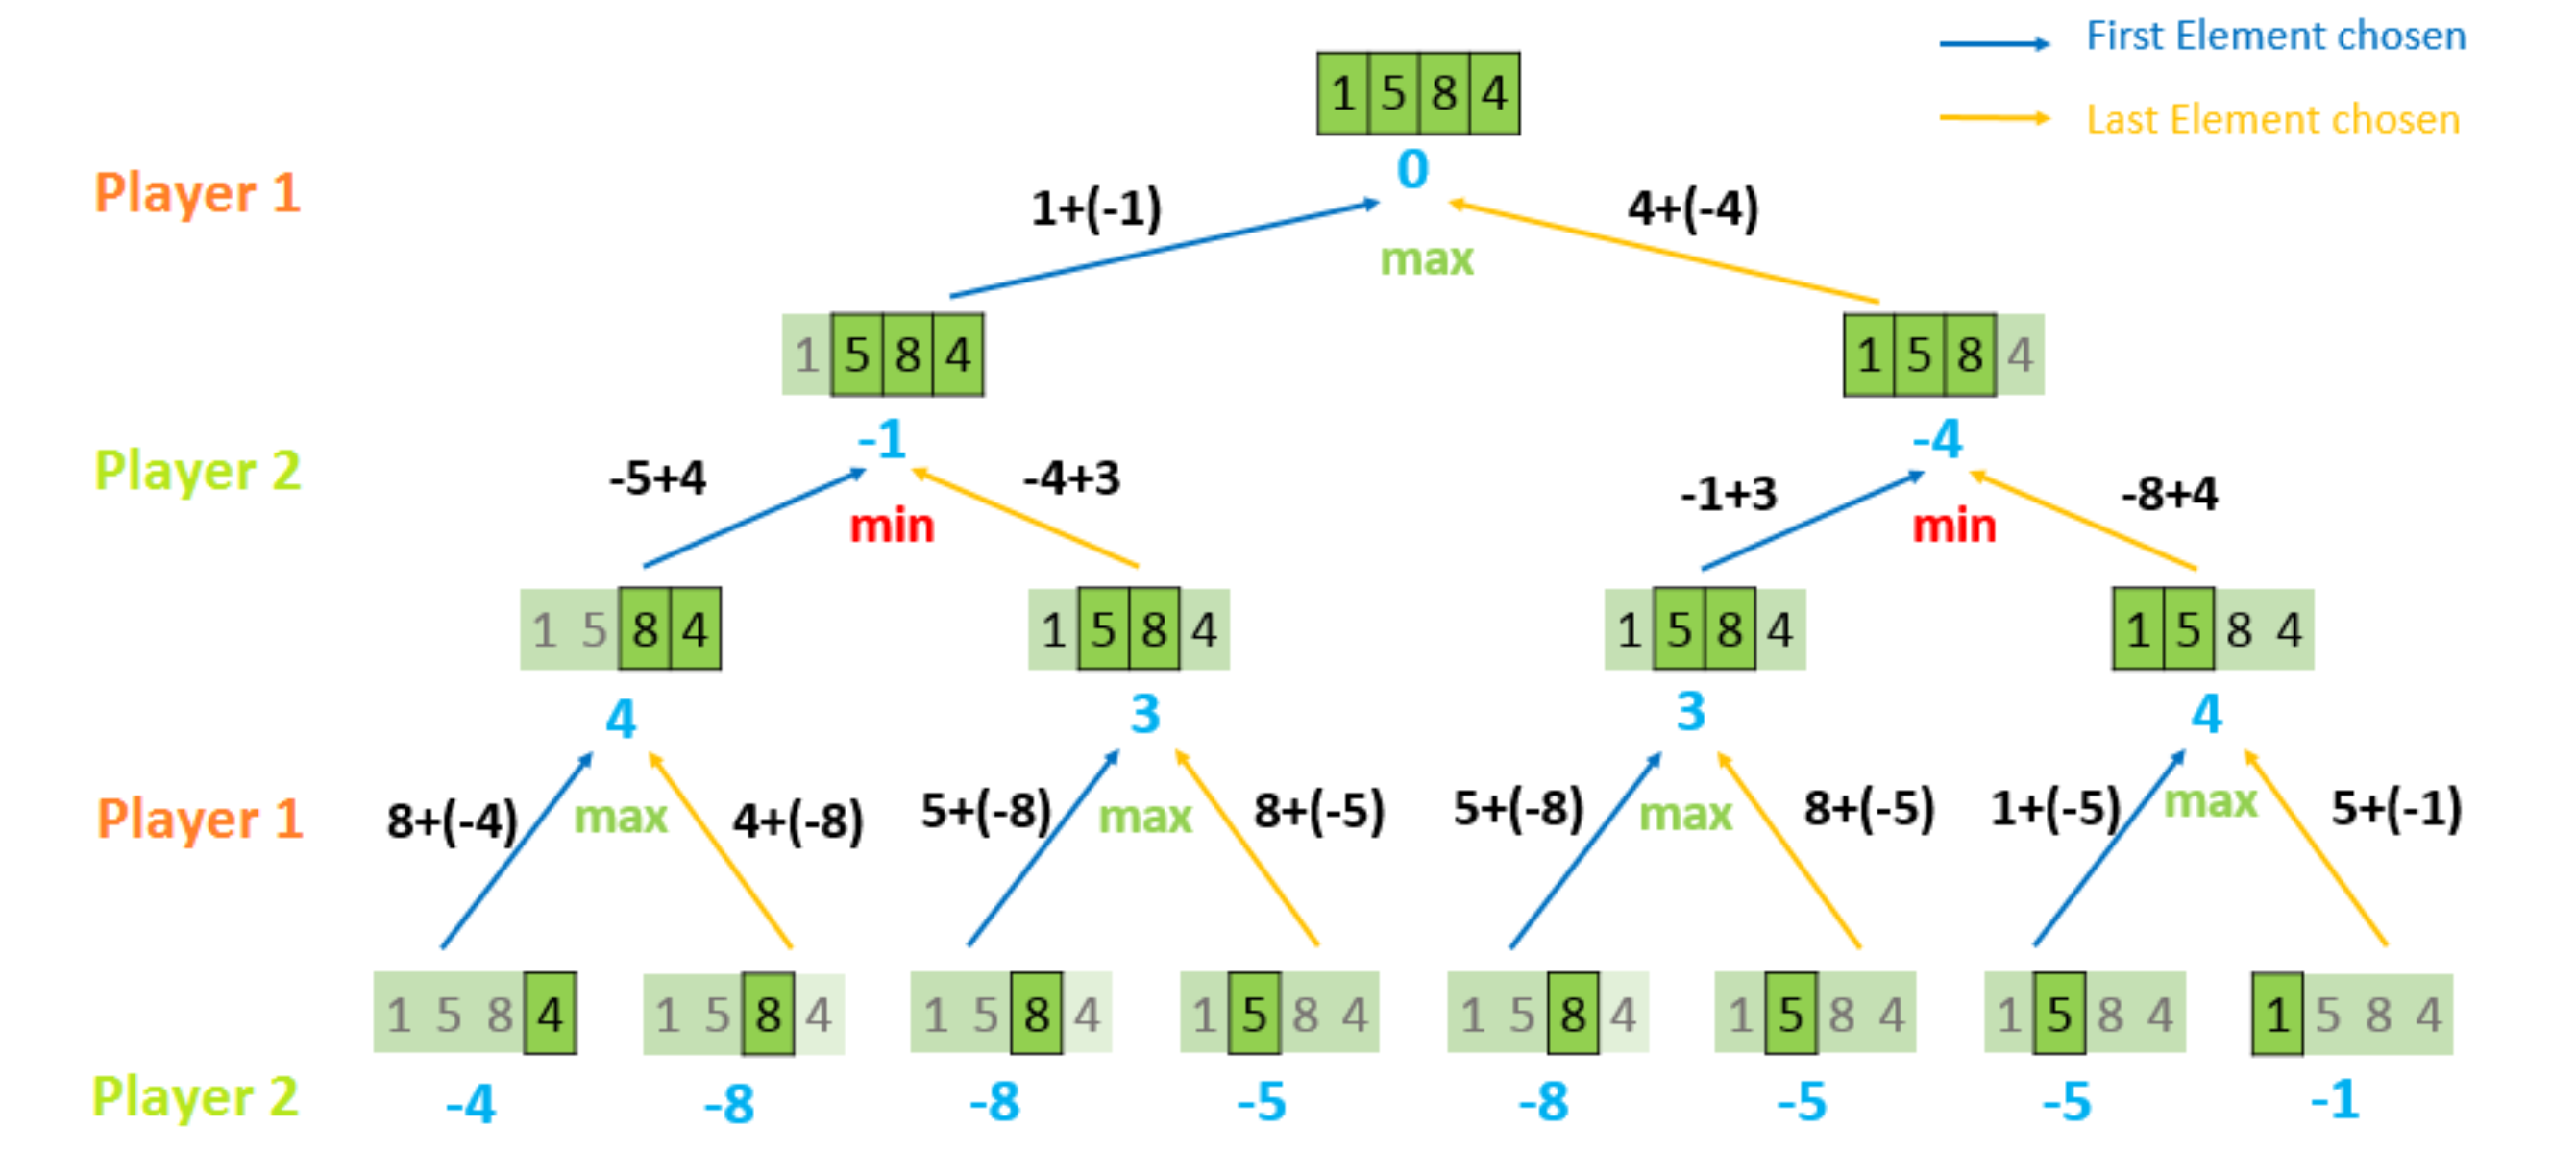

- Second Method:
The second method is similar to the first one. The only difference is that we using hash table to memorize the cases which are the same. The advantage is that we can improve our **time complexity** from **O(2^n) -> O(n^2)**. In Python, this method could pass the Leetcode test cases which the first one couldn't.

In [ ]:
#right answer but Time Limit Exceeded
#Time complexity: O(2^n)
#Space complexity: O(n)
def PredictTheWinner(self, nums):
        """
        :type nums: List[int]
        :rtype: bool
        """
    return self.getScore(nums,0,len(nums)-1)>=0

def getScore(self,nums,l,r):
    if l == r:
        return nums[l]

    return max(nums[l]-self.getScore(nums,l+1,r),nums[r]-self.getScore(nums,l,r-1))


In [ ]:
#Time Complexity: O(n^2)
#Space Complexity: O(n^2+n)

def PredictTheWinner(self, nums):
        """
        :type nums: List[int]
        :rtype: bool
        """
        cache={}
        def getScore(nums,l,r):
            if l==r:
                return nums[l]
            
            if (l,r) in cache:
                return cache[(l,r)]
            
            left=nums[l]-getScore(nums,l+1,r)
            right=nums[r]-getScore(nums,l,r-1)
            cache[(l,r)]=max(left,right)
            
            return max(left,right)
        
        return getScore(nums,0,len(nums)-1)>=0